In [ ]:
import pandas as pd

df = pd.read_csv(r"D:\Text Mining\Project\merged_newsapi_data.csv")

df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

df['Label'] = 'Unknown'

df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'

print(" Label Distribution:")
print(df['Label'].value_counts())

print("\n Sample of Labeled Data:")
print(df[['Title', 'Description', 'Label']].head())

df.to_csv("D:\Text Mining\Project\labeled_news_dataset.csv", index=False)


 Label Distribution:
Label
Tech         92
Business     63
Unknown      32
Education    13
Name: count, dtype: int64

 Sample of Labeled Data:
                                               Title  \
0  International universities give graduates an edge   
1                   Growing Malaysia’sAI talent pool   
2  Only 9% of Japanese people have used generativ...   
3  As Meta and tech giants trim jobs, will 2025 w...   
4  The Rise Of The Hybrid Workforce: Humans And A...   

                                         Description      Label  
0  KUALA LUMPUR: Students should choose an intern...  Education  
1  WHILE Malaysia strives to embed artificial int...   Business  
2  While 61 percent of Japanese people are aware ...       Tech  
3  Meta eliminated 3,000 positions, while Workday...    Unknown  
4  We are moving from the hybrid workplace, with ...       Tech  


<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:26: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:26: SyntaxWarning: invalid escape sequence '\T'
C:\Users\saahi\AppData\Local\Temp\ipykernel_10108\3942857029.py:4: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("D:\Text Mining\Project\merged_newsapi_data.csv")
C:\Users\saahi\AppData\Local\Temp\ipykernel_10108\3942857029.py:26: SyntaxWarning: invalid escape sequence '\T'
  df.to_csv("D:\Text Mining\Project\labeled_news_dataset.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")

if df['Label'].nunique() == 1 and df['Label'].unique()[0] == 'Unknown':
    np.random.seed(42)
    df['Label'] = np.random.choice(['Tech', 'Education', 'Business'], size=len(df))

X = df['Processed_Description']  
y = df['Label']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_set = pd.DataFrame({'Processed_Description': X_train, 'Label': y_train})
test_set = pd.DataFrame({'Processed_Description': X_test, 'Label': y_test})

# Show small samples
print(" Training Set Sample:")
print(train_set.head())
print("\n Testing Set Sample:")
print(test_set.head())


 Training Set Sample:
                                 Processed_Description    Label
178  fast ai innovation comes at the expense of gov...     Tech
90   socure, the leading provider of artificial int...     Tech
127  today's workforce is struggling to keep up wit...     Tech
41   the vice president’s speech at the paris ai su...     Tech
155  an entrepreneurial mindset is valuable in this...  Unknown

 Testing Set Sample:
                                 Processed_Description     Label
133  discover ai's future in 2025! see how chatgpt,...  Business
189  ai could replace millions of jobs by 2030, wit...      Tech
30   the german economy is struggling with stagnati...  Business
57   new resources and ai-powered tools simplify th...      Tech
65   driven by the demand for renewable energy and ...   Unknown


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\saahi\AppData\Local\Temp\ipykernel_10108\2444112279.py:6: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("D:\Text Mining\Project\labeled_news_dataset.csv")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")

df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'

df_clean = df[df['Label'] != 'Unknown']

X = df_clean['text']
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', MultinomialNB())     
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))


 Classification Report:

              precision    recall  f1-score   support

    Business       0.60      0.46      0.52        13
   Education       1.00      0.67      0.80         3
        Tech       0.68      0.83      0.75        18

    accuracy                           0.68        34
   macro avg       0.76      0.65      0.69        34
weighted avg       0.68      0.68      0.67        34



Classification Report:
              precision    recall  f1-score   support

    Business       0.60      0.46      0.52        13
   Education       1.00      0.67      0.80         3
        Tech       0.68      0.83      0.75        18

    accuracy                           0.68        34
   macro avg       0.76      0.65      0.69        34
weighted avg       0.68      0.68      0.67        34



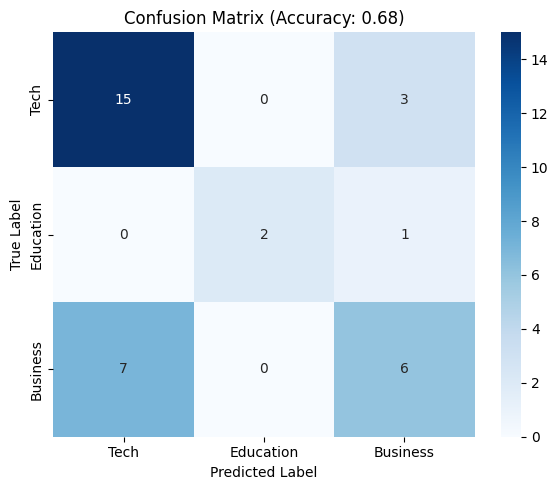

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"labeled_news_dataset.csv")

df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'

df_clean = df[df['Label'] != 'Unknown']

X = df_clean['text']
y = df_clean['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

labels = ['Tech', 'Education', 'Business']
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
